# School Bus Optimization Problem

### Problem Description

A school needs to transport N students to the zoo using buses. There are three types of buses available for capacity and cost:

- A, 35 seats, 300€ each
- B, 49 students, 400€ each
- C, 57 students, 450€ each

The objective is to minimize the total cost of buses while transporting all students.

### Assumptions

- All students must be transported
- Buses can operate below capacity but at the same cost, regardless of the number of the occupied places
- Occupied seats are an integer number

### Approach

We will compare different scenarios to find the cost-effective solution:

- Trivial solutions: using only buses A, B, C
- Educated guess starting from a practical hypothesis
- Combining both types of buses for an optimal solution (linear programming)
- Verifying with an iterative solution

### Performance

Each option is implemented in the `BusAllocation` class of th `optimization.core.bus_allocation` module. The `time_measure`, `performance_measure` and `print_output` functions are used as decorators to helps estimating time and memory usage, to be taken into consideration for a scalable solution.

### Case 1

An easy scenario is taken to demonstrate the procedure

### Case 2

A more sophisticated scenario is shown to show how for large problems, the best solution is linear programming

In [1]:
from optimization.core.bus_allocation import BusAllocation

# Define constants
n_students = 1234

seat_a = 35
cost_a = 300

seat_b = 49
cost_b = 400

seat_c = 57
cost_c = 450

bus_allocator = BusAllocation((seat_a, seat_b, seat_c), (cost_a, cost_b, cost_c), n_students)

### Options 1-3: Trivial Solutions

If we use only buses A, B or C, these are the results.

Number of buses A required: {{n_students}}$\frac{{n_students}}{seat_a} = 11.2$. 
We need 12 30-seaters to accomodate all students.

In [2]:
option_1 = bus_allocator.trivial_solution('A')
option_2 = bus_allocator.trivial_solution('B')
option_3 = bus_allocator.trivial_solution('C')

(A, B, C) = (36, 0, 0)
Minimum total cost: 10800€
(A, B, C) = (0, 26, 0)
Minimum total cost: 10400€
(A, B, C) = (0, 0, 22)
Minimum total cost: 9900€


### Option 4: Educated Guess

We can use aset up a simple optimization algorithm using an iterative approach to determine the fewest buses required for the lowest cost. 
Intuitively, the price of one seat is lower in the 40-seat buses (i.e. 500€ for 40-seats, or 12.5€ per seats) than in the 30-seat buses 
(i.e. 400€ for 30seats, or 13.3€ per seats). 
Thus we will try to fill as many 40-seat buses first and the remaining 30-seaters with the remaining students.

- Number of 30-seat buses: 1
- Number of 40-seat buses: 8
- Total cost: 4400€

In [3]:
option_4 = bus_allocator.educated_guess()

(A, B, C) = (2, 0, 21)
Minimum total cost: 10050€


In [4]:
option_5 = bus_allocator.linear_programming()

(A, B, C) = (0, 2, 20)
Minimum total cost: 9800.0€


In [8]:
option_6 = bus_allocator.iterative_solution()
true_lowest_cost = option_6['minimum_total_cost']

(A, B, C) = (0, 2, 20)
Minimum total cost: 9800€


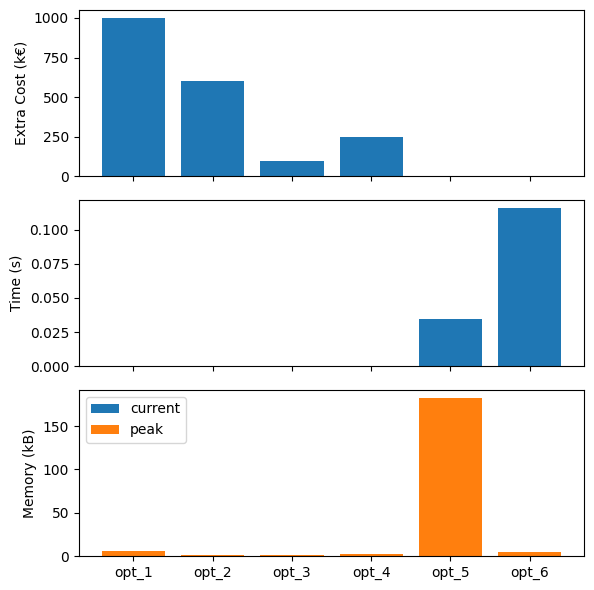

In [21]:
import matplotlib.pyplot as plt

all_options = [option_1, option_2, option_3, option_4, option_5, option_6] 
fig, ax = plt.subplots(3,1, sharex=True, figsize=(6,6))

labels = [f'opt_{i}' for i in range(1,7)]
ax[0].bar(labels, [ (opt['minimum_total_cost']-true_lowest_cost) for opt in all_options ])
ax[1].bar(labels, [ opt['elapsed_time'] for opt in all_options ])
ax[2].bar(labels, [ opt['current']/1000 for opt in all_options ], label = 'current')
ax[2].bar(labels, [ opt['peak']/1000 for opt in all_options ], label='peak')
ax[2].legend()

ax[0].set_ylabel('Extra Cost (k€)')
ax[1].set_ylabel('Time (s)')
ax[2].set_ylabel('Memory (kB)')

plt.tight_layout()

In [28]:
# Define constants
n_students = int(1e4)

bus_allocator = BusAllocation((seat_a, seat_b, seat_c), (cost_a, cost_b, cost_c), n_students)

(A, B, C) = (1, 0, 175)
Minimum total cost: 79050€
(A, B, C) = (1, 1, 174)
Minimum total cost: 79000.0€
(A, B, C) = (0, 4, 172)
Minimum total cost: 79000€


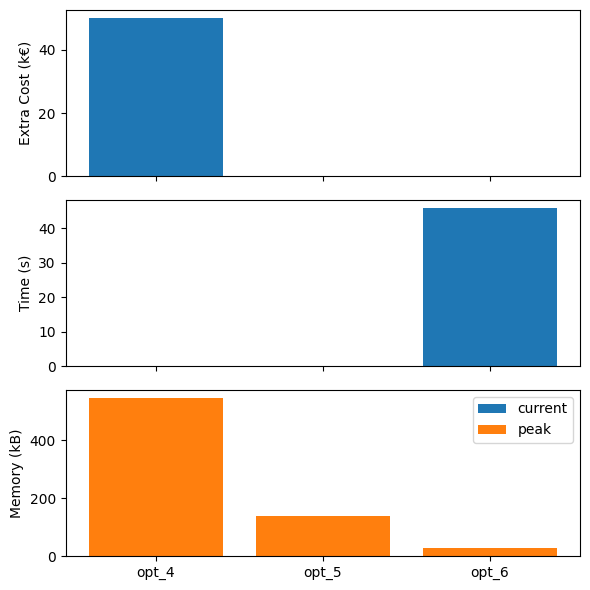

In [29]:
option_4 = bus_allocator.educated_guess()
option_5 = bus_allocator.linear_programming()
option_6 = bus_allocator.iterative_solution()
true_lowest_cost = option_6['minimum_total_cost']

all_options = [option_4, option_5, option_6] 
fig, ax = plt.subplots(3,1, sharex=True, figsize=(6,6))

labels = [f'opt_{i}' for i in range(4,7)]
ax[0].bar(labels, [ (opt['minimum_total_cost']-true_lowest_cost) for opt in all_options ])
ax[1].bar(labels, [ opt['elapsed_time'] for opt in all_options ])
ax[2].bar(labels, [ opt['current']/1000 for opt in all_options ], label = 'current')
ax[2].bar(labels, [ opt['peak']/1000 for opt in all_options ], label='peak')
ax[2].legend()

ax[0].set_ylabel('Extra Cost (k€)')
ax[1].set_ylabel('Time (s)')
ax[2].set_ylabel('Memory (kB)')

plt.tight_layout()